In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import l2,l1  
from tensorflow.keras.layers import Input
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
from sklearn import svm

In [126]:
data = pd.read_csv('data/emotions.csv')

In [127]:
data

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      23.50   
1          1.680       2.880       3.830       -4.82  ...     -23.30   
2          3.360      90.200      89.900        2.03  ...     462.00   
3         -0.284       8.820       2.300       -1.97  ...     299.00   
4         -5.790       3.060      41.400        5.52  ...      12.00   
...          ...         ...         ...         ...  ...        ...   
2127      -2.030       0.647      -0.121       -1.10  ...     -21.70   
2128       1.090       4.460       4.720        6.63  ...     594.00   
2129       6.900      12.700       2.030        4.64  ...     370.00   
2130       1.580     -16.000       1.690        4.74  ...     124.00   
2131       1.950       6.210       3.490       -3.51  ...       1.95   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0        20.300     20.300      23.50     -215.0     280.00    -162.00   
1       -21.800    -21.800     -23.30      182.0       2.57     -31.60   
2      -233.000   -233.000     462.00     -267.0     281.00    -148.00   
3      -243.000   -243.000     299.00      132.0     -12.40       9.53   
4        38.100     38.100      12.00      119.0     -17.60      23.90   
...         ...        ...        ...        ...        ...        ...   
2127      0.218      0.218     -21.70       95.2     -19.90      47.20   
2128   -324.000   -324.000     594.00      -35.5     142.00     -59.80   
2129   -160.000   -160.000     370.00      408.0    -169.00     -10.50   
2130    -27.600    -27.600     124.00     -656.0     552.00    -271.00   
2131      1.810      1.810       1.95      110.0      -6.71      22.80   

      fft_748_b  fft_749_b     label  
0       -162.00     280.00  NEGATIVE  
1        -31.60       2.57   NEUTRAL  
2       -148.00     281.00  POSITIVE  
3          9.53     -12.40  POSITIVE  
4         23.90     -17.60   NEUTRAL  
...         ...        ...       ...  
2127      47.20     -19.90   NEUTRAL  
2128     -59.80     142.00  POSITIVE  
2129     -10.50    -169.00  NEGATIVE  
2130    -271.00     552.00  NEGATIVE  
2131      22.80      -6.71   NEUTRAL  

[2132 rows x 2549 columns]

In [128]:
fft_data = data.loc[:,'fft_0_a':'fft_749_a']

Almost balanced classes
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64


<Axes: >

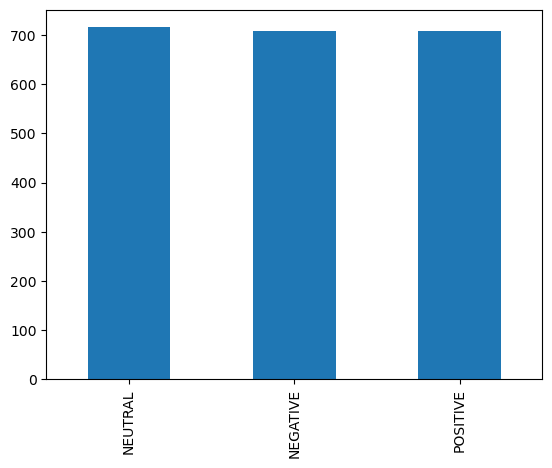

In [129]:
print(f'Almost balanced classes\n{data.label.value_counts()}')
data.label.value_counts().plot(kind='bar')

In [130]:
positive = data.loc[data["label"]=='POSITIVE']
negative = data.loc[data["label"]=='NEGATIVE']
neutral = data.loc[data["label"]=='NEUTRAL']
neutral.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
1         28.8      33.1      32.0      25.8      22.8        6.55   
4         28.3      31.3      45.2      27.3      24.5       34.80   
5         31.0      30.9      29.6      28.5      24.0        1.65   
8         11.5      29.7      34.9      10.2      26.9      -38.00   
12        30.1      32.7      29.4      28.3      24.3       -6.05   

    mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  \
1         1.68        2.88        3.83       -4.82  ...     -23.30      -21.8   
4        -5.79        3.06       41.40        5.52  ...      12.00       38.1   
5         1.54        3.83        1.87       -1.21  ...      -1.48       30.2   
8        -1.65        3.89      -33.50       -3.30  ...      -8.38       38.7   
12       -3.94        1.69       -3.57        6.02  ...      12.00      -21.5   

    fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  \
1       -21.8     -23.30      182.0       2.57      -31.6      -31.6   
4        38.1      12.00      119.0     -17.60       23.9       23.9   
5        30.2      -1.48      134.0       3.59      -12.7      -12.7   
8        38.7      -8.38      115.0      -7.00        3.2        3.2   
12      -21.5      12.00      152.0      23.60      -16.4      -16.4   

    fft_749_b    label  
1        2.57  NEUTRAL  
4      -17.60  NEUTRAL  
5        3.59  NEUTRAL  
8       -7.00  NEUTRAL  
12      23.60  NEUTRAL  

[5 rows x 2549 columns]

### Class a

The EEG signal's frequency is shown on the x-axis, and its strength at each frequency is shown on the y-axis.

<Axes: title={'center': 'fft of neutral columns'}>

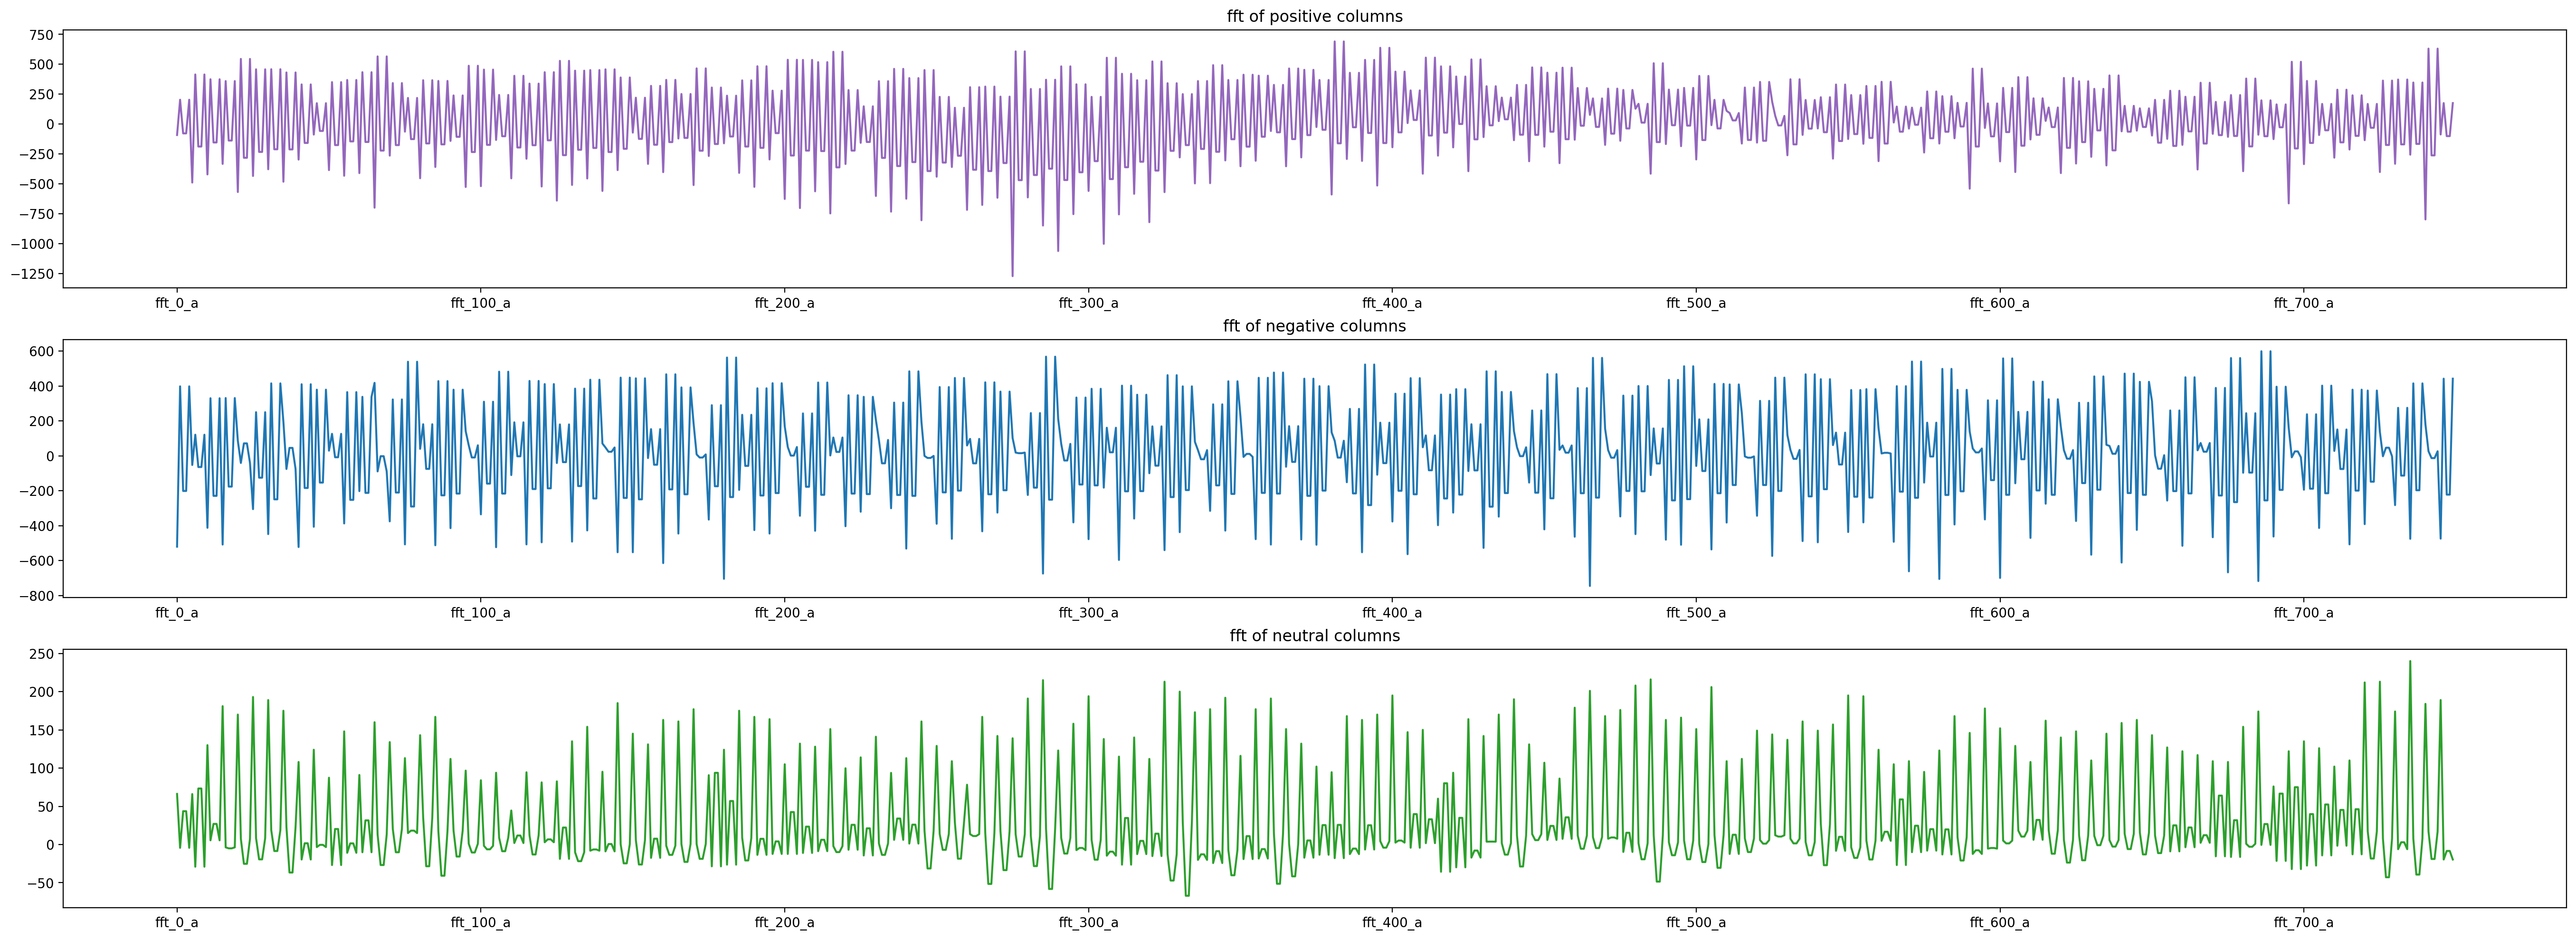

In [131]:
fig,axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(34,12))

#Positive 
positive.loc[2, 'fft_0_a':'fft_749_a'].plot(title='fft of positive columns', color = 'tab:purple', ax=axes[0])
#Negative
negative.loc[0, 'fft_0_a':'fft_749_a'].plot(title='fft of negative columns', color = 'tab:blue', ax=axes[1])
#Neutral
neutral.loc[1, 'fft_0_a':'fft_749_a'].plot(title='fft of neutral columns', color = 'tab:green', ax=axes[2])

<Axes: title={'center': 'Mean for neutral columns'}>

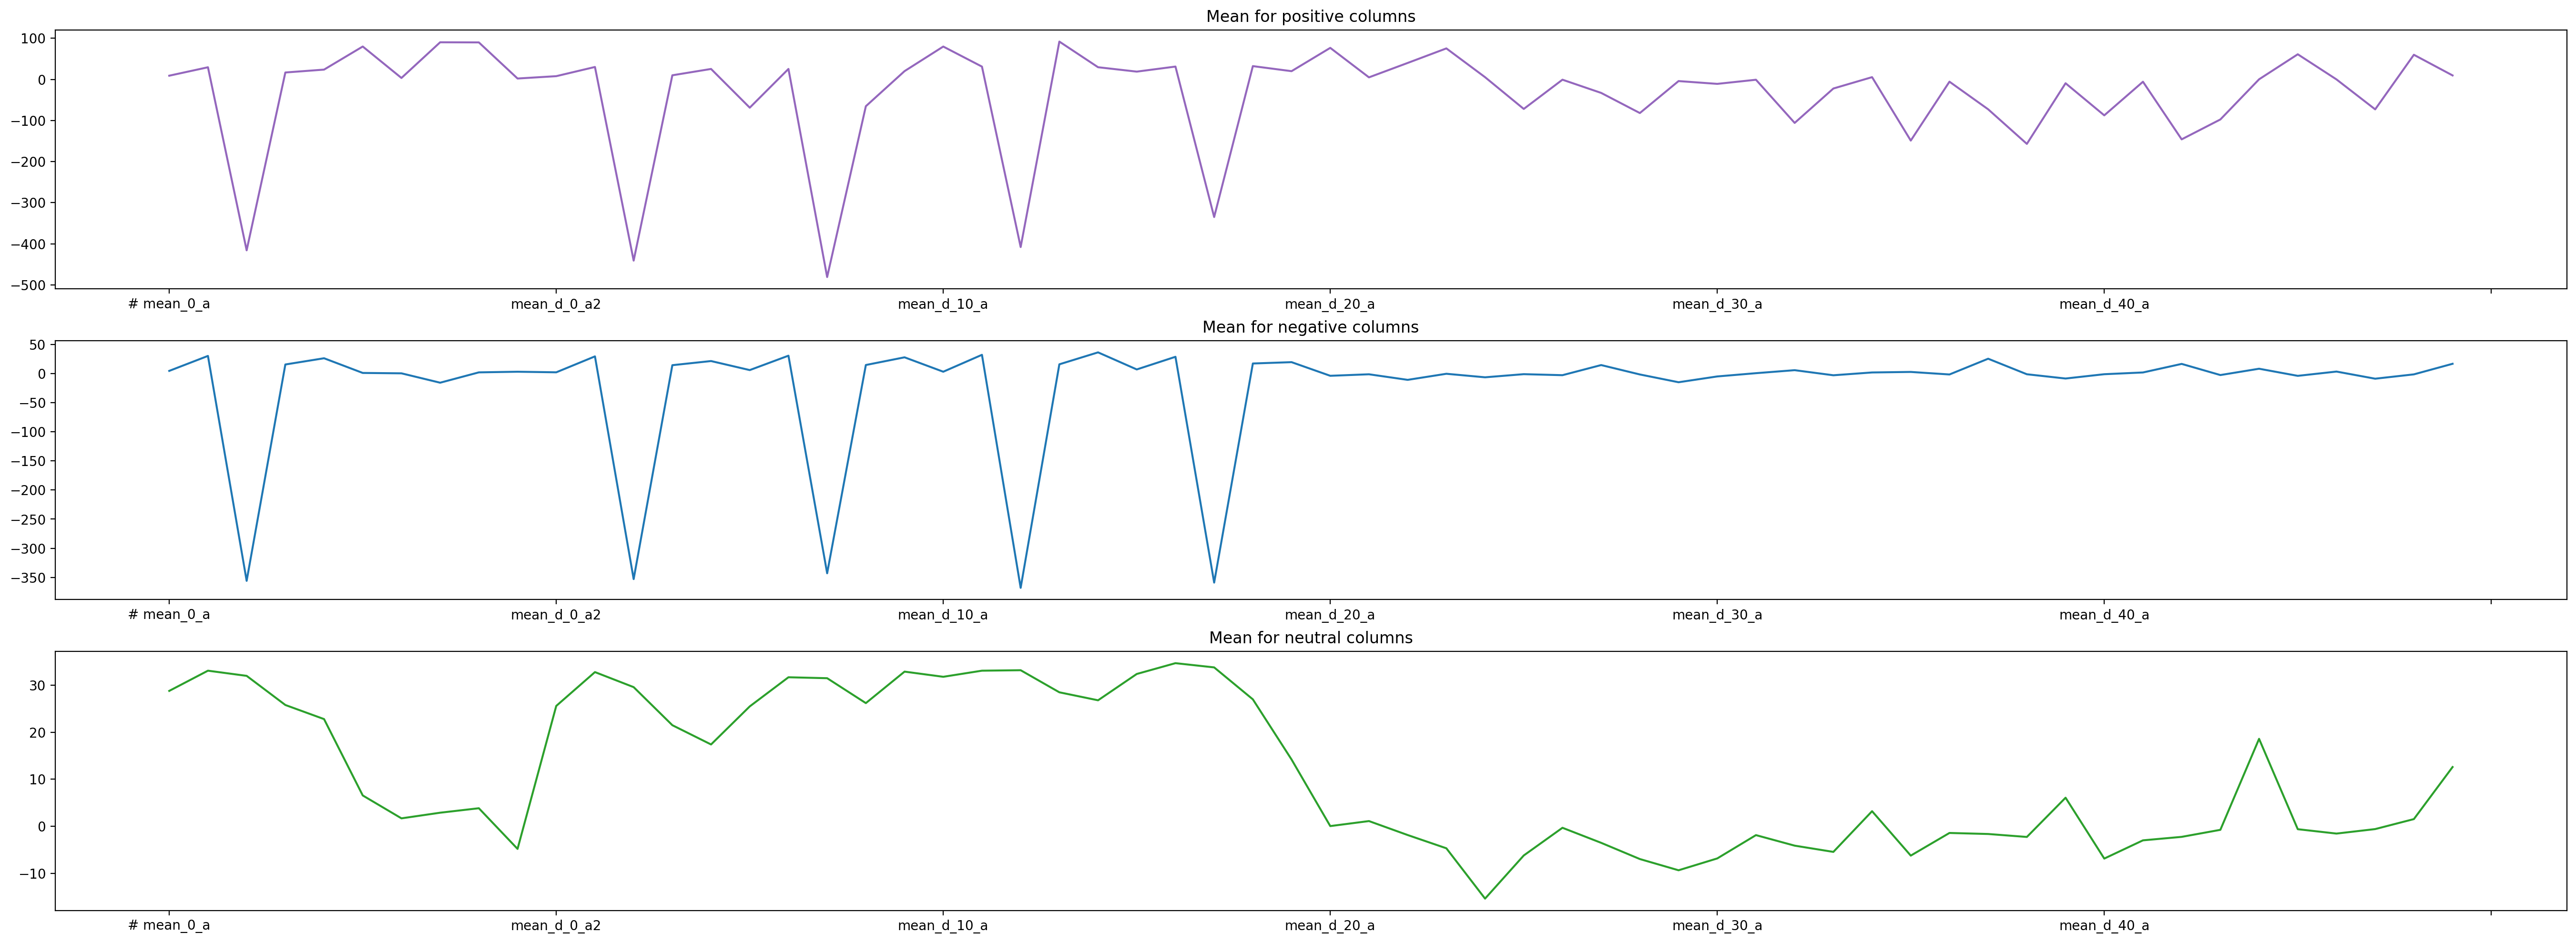

In [134]:
fig,axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(34,12))

#Positive 
positive.loc[2, '# mean_0_a':'mean_d_49_a'].plot(title='Mean for positive columns', color = 'tab:purple', ax=axes[0])
#Negative
negative.loc[0, '# mean_0_a':'mean_d_49_a'].plot(title='Mean for negative columns', color = 'tab:blue', ax=axes[1])
#Neutral
neutral.loc[1, '# mean_0_a':'mean_d_49_a'].plot(title='Mean for neutral columns', color = 'tab:green', ax=axes[2])

<Axes: title={'center': 'Covmat for neutral column'}>

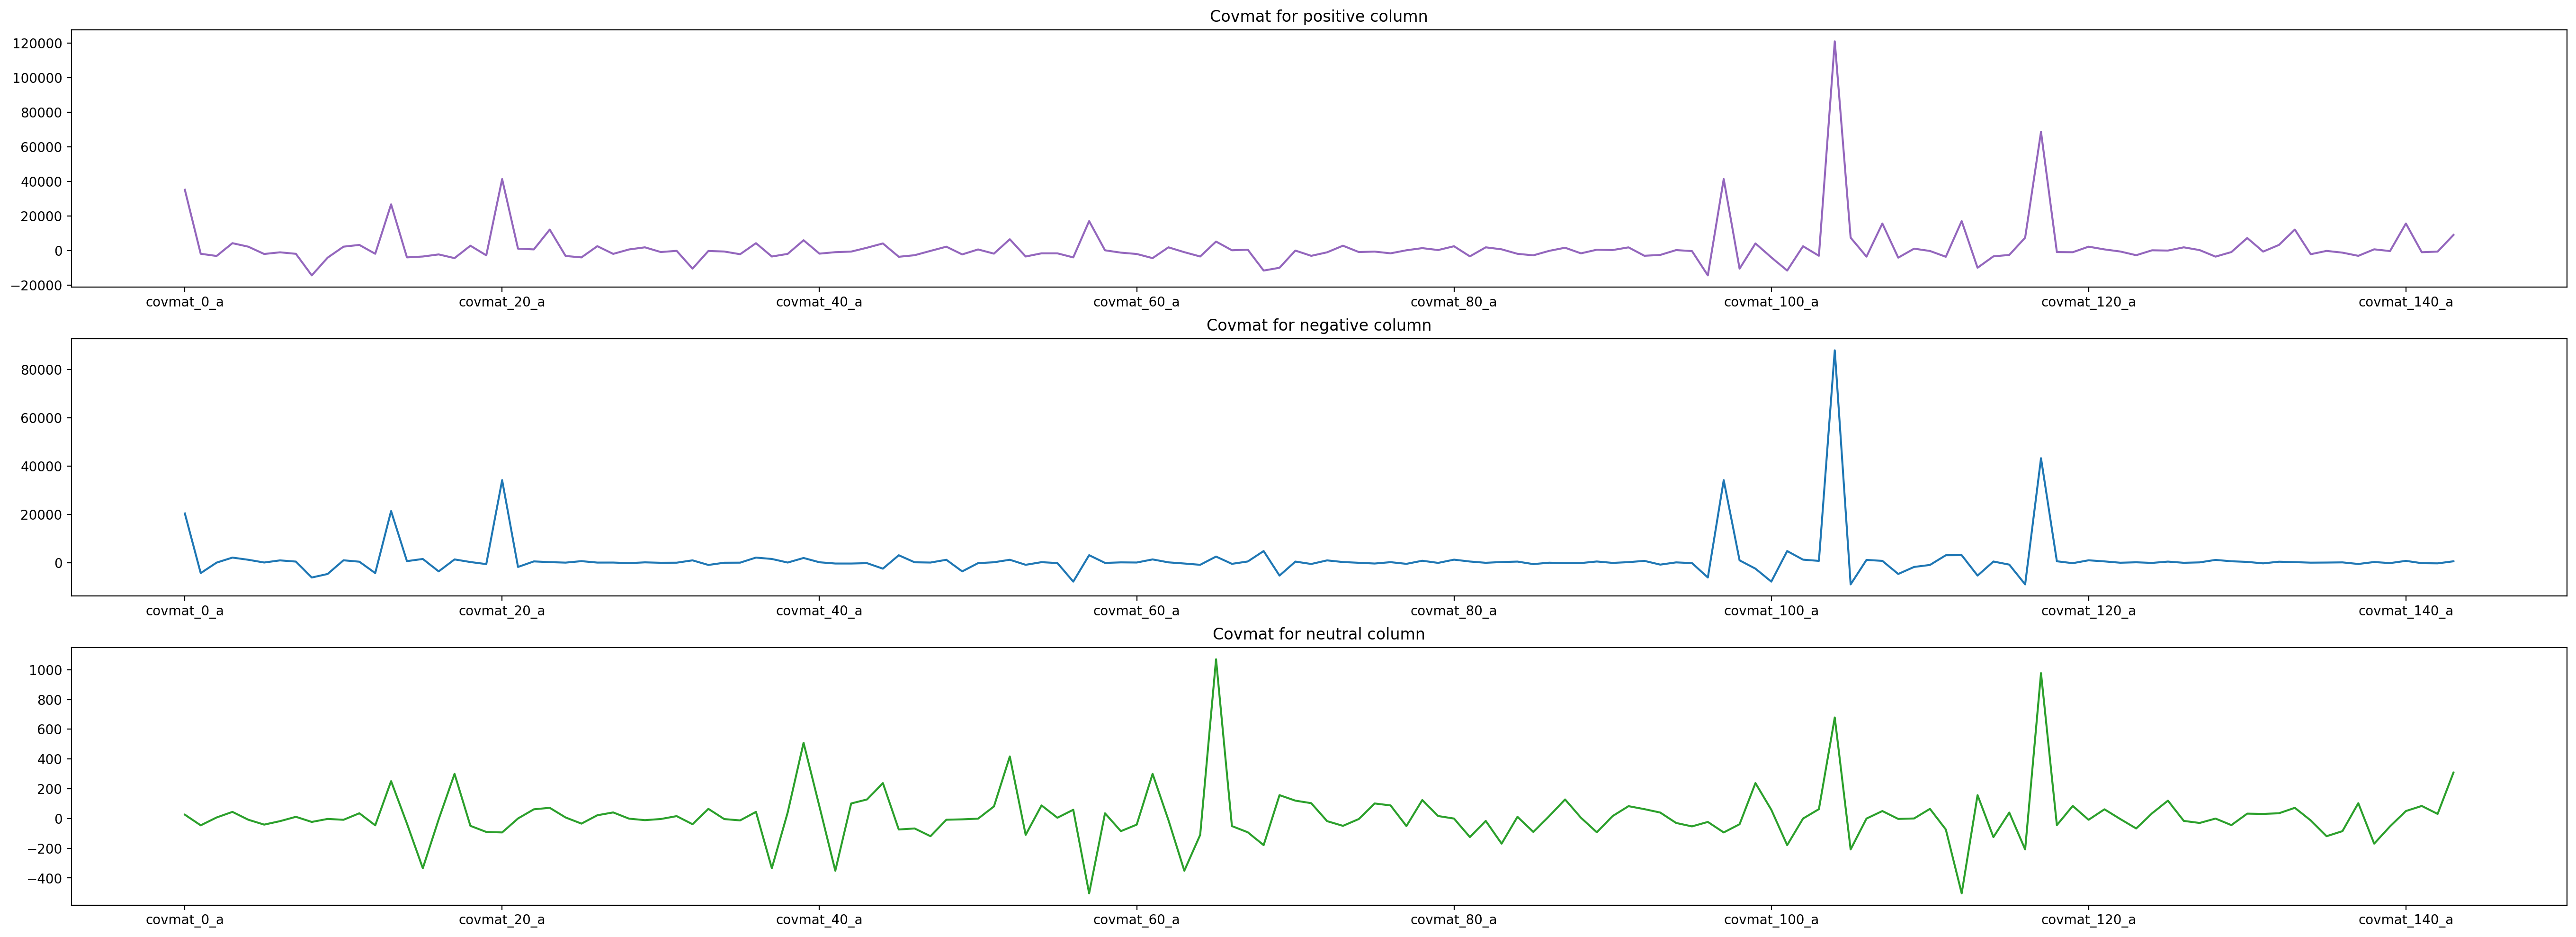

In [135]:
fig,axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(34,12))

#Positive 
positive.loc[2, 'covmat_0_a':'covmat_143_a'].plot(title='Covmat for positive column', color = 'tab:purple', ax=axes[0])
#Negative
negative.loc[0, 'covmat_0_a':'covmat_143_a'].plot(title='Covmat for negative column', color = 'tab:blue', ax=axes[1])
#Neutral
neutral.loc[1, 'covmat_0_a':'covmat_143_a'].plot(title='Covmat for neutral column', color = 'tab:green', ax=axes[2])

### Class b

<Axes: title={'center': 'fft of neutral columns'}>

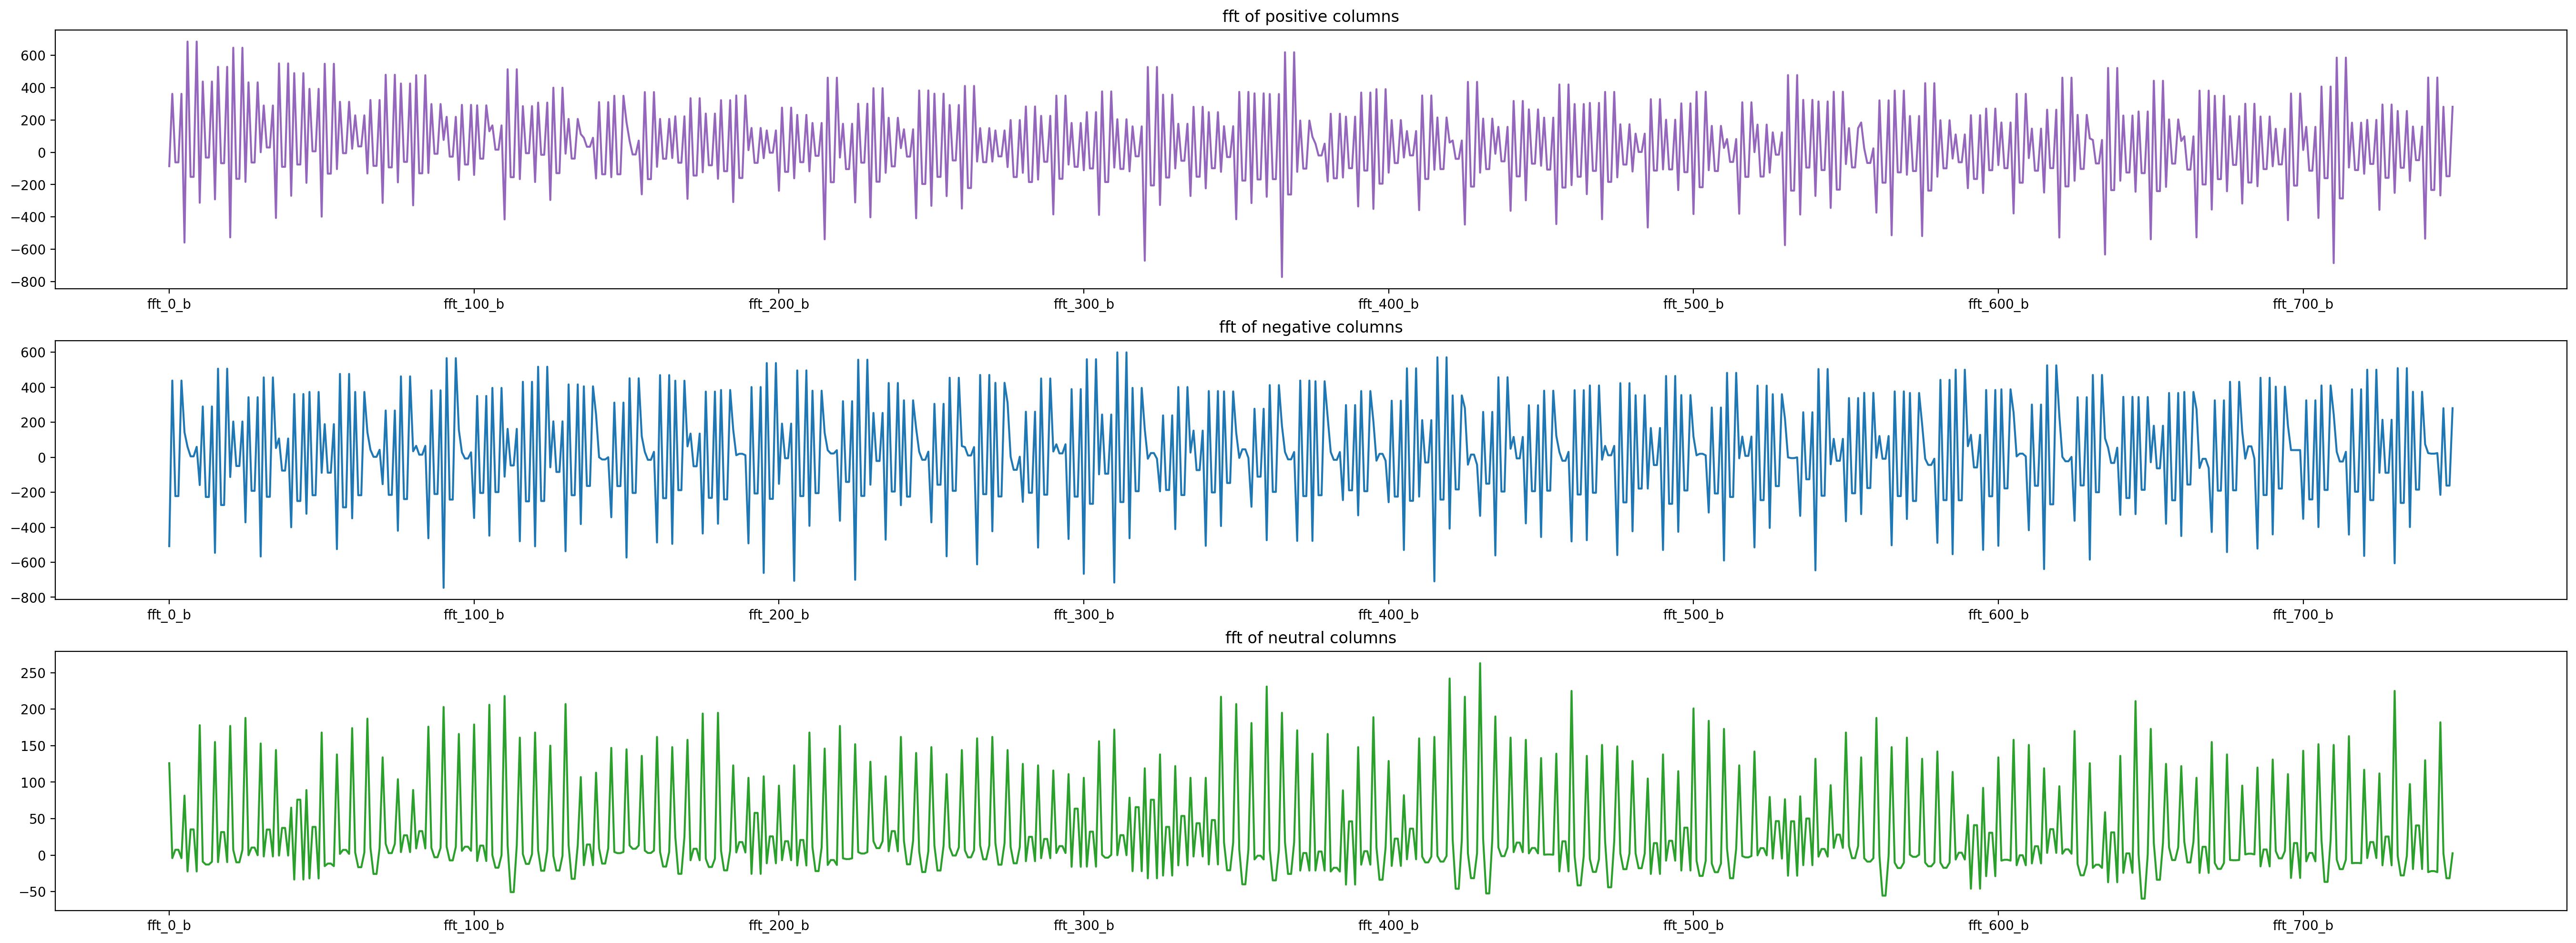

In [136]:
fig,axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(34,12))

#Positive 
positive.loc[2, 'fft_0_b':'fft_749_b'].plot(title='fft of positive columns', color = 'tab:purple', ax=axes[0])
#Negative
negative.loc[0, 'fft_0_b':'fft_749_b'].plot(title='fft of negative columns', color = 'tab:blue', ax=axes[1])
#Neutral
neutral.loc[1, 'fft_0_b':'fft_749_b'].plot(title='fft of neutral columns', color = 'tab:green', ax=axes[2])

Observed fft values for a and b
positive 
a = -1250 to 700
b = -800 to 600

negative 
a = -800 to 600
b = -800 to 600

neutral
a = -50 to 250
b = -50 to 250

### Encoding target variable and scaling the data

In [137]:
x=data.drop(["label"]  ,axis=1)

#Scaling the data
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)    

#Encoding data
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
Y = data['label'].copy()

### KNN

In [138]:
k_range = range(1, 31)
k_scores = []

knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, Y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [139]:
#top performing n_neighbors value
print(knn_gscv.best_params_)

#mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'n_neighbors': 3}
0.9488768677639609


Accuracy for KNN - 94.8%

### SVM

#### Splitting data into training and testing sets

In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2)

In [141]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {kernel} kernel: {accuracy:.2f}')

    print (f'Classification Report for {kernel} kernel SVM:\n', classification_report(y_test, y_pred))
    confusion_matrix_graph = confusion_matrix(y_test, y_pred)

Accuracy for linear kernel: 0.98
Classification Report for linear kernel SVM:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       0.99      0.99      0.99       148
           2       0.97      0.96      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Accuracy for poly kernel: 0.91
Classification Report for poly kernel SVM:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       143
           1       0.97      0.96      0.97       148
           2       0.81      0.93      0.87       136

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.92      0.91      0.91       427

Accuracy for rbf kernel: 0.96
Classification Report for rbf kernel SVM:
            

#### SVM with cross validation on linear kernel

In [142]:
clf = svm.SVC(kernel='linear')
cv_scores = cross_val_score(clf, X, Y, cv=5)

# Evaluate the model
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.95784543 0.96252927 0.97183099 0.96948357 0.9600939 ]
Mean Accuracy: 0.96
Standard Deviation: 0.01


### Random forest

In [144]:
n_estimators = [50,100,200,300]

for n in n_estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    #cross validation
    cv_scores = cross_val_score(rf_classifier, X, Y, cv=5)

    # Print the cross-validation scores
    print("Cross-validation scores :", cv_scores)
    mean_accuracy = cv_scores.mean()
    std_deviation = cv_scores.std()
    print(f"Mean Accuracy for {n} trees: {mean_accuracy:.2f}")
    print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores : [0.9765808  0.99063232 0.99530516 0.98122066 0.98591549]
Mean Accuracy for 50 trees: 0.99
Standard Deviation: 0.01
Cross-validation scores : [0.97892272 0.99063232 0.99295775 0.98591549 0.98356808]
Mean Accuracy for 100 trees: 0.99
Standard Deviation: 0.01
Cross-validation scores : [0.98126464 0.99297424 0.99061033 0.98591549 0.98591549]
Mean Accuracy for 200 trees: 0.99
Standard Deviation: 0.00
Cross-validation scores : [0.98126464 0.99063232 0.99061033 0.99061033 0.98826291]
Mean Accuracy for 300 trees: 0.99
Standard Deviation: 0.00


In [145]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      1.00      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



### Neural networks

In [175]:
model = keras.Sequential([
    Input(shape=(x_train.shape[1])),
    Dense(256, activation='relu',kernel_regularizer=l1(0.005)),
    Dense(128, activation='relu',kernel_regularizer=l1(0.005)),
    Dense(3, activation='linear')
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
          loss=SparseCategoricalCrossentropy(from_logits=True), 
          metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.2, epochs=100)

x_int = x_test.astype(int)
y_pred = model.predict(x_int)
y_pred_sig = tf.nn.sigmoid(y_pred)

loss, accuracy = model.evaluate(x_test,y_test)

print(f'Test accuracy without sigmoid: {accuracy}')

Epoch 1/100
43/43 [==============================] - 13s 157ms/step - loss: 81.9630 - accuracy: 0.7852 - val_loss: 76.9137 - val_accuracy: 0.9296
Epoch 2/100
43/43 [==============================] - 5s 127ms/step - loss: 72.3257 - accuracy: 0.9164 - val_loss: 67.3890 - val_accuracy: 0.9413
Epoch 3/100
43/43 [==============================] - 4s 89ms/step - loss: 62.8211 - accuracy: 0.9355 - val_loss: 58.0167 - val_accuracy: 0.9384
Epoch 4/100
43/43 [==============================] - 4s 95ms/step - loss: 53.6736 - accuracy: 0.9472 - val_loss: 49.1475 - val_accuracy: 0.9472
Epoch 5/100
43/43 [==============================] - 4s 94ms/step - loss: 45.1245 - accuracy: 0.9545 - val_loss: 41.0060 - val_accuracy: 0.9589
Epoch 6/100
43/43 [==============================] - 4s 89ms/step - loss: 37.3776 - accuracy: 0.9611 - val_loss: 33.6632 - val_accuracy: 0.9589
Epoch 7/100
43/43 [==============================] - 4s 90ms/step - loss: 30.4294 - accuracy: 0.9648 - val_loss: 27.1444 - val_accura

43/43 [==============================] - 4s 93ms/step - loss: 0.3586 - accuracy: 0.9861 - val_loss: 0.3733 - val_accuracy: 0.9707
Epoch 59/100
43/43 [==============================] - 4s 99ms/step - loss: 0.3541 - accuracy: 0.9868 - val_loss: 0.3692 - val_accuracy: 0.9765
Epoch 60/100
43/43 [==============================] - 4s 103ms/step - loss: 0.3512 - accuracy: 0.9890 - val_loss: 0.3663 - val_accuracy: 0.9795
Epoch 61/100
43/43 [==============================] - 4s 105ms/step - loss: 0.3475 - accuracy: 0.9875 - val_loss: 0.3661 - val_accuracy: 0.9824
Epoch 62/100
43/43 [==============================] - 4s 96ms/step - loss: 0.3453 - accuracy: 0.9897 - val_loss: 0.3592 - val_accuracy: 0.9824
Epoch 63/100
43/43 [==============================] - 4s 99ms/step - loss: 0.3430 - accuracy: 0.9890 - val_loss: 0.3603 - val_accuracy: 0.9707
Epoch 64/100
43/43 [==============================] - 4s 93ms/step - loss: 0.3401 - accuracy: 0.9883 - val_loss: 0.3546 - val_accuracy: 0.9795
Epoch 65/1

In [176]:
# Predict
y_pred = model.predict(x_test)
y_pred_sig = tf.nn.sigmoid(y_pred)

#Accuracy 
argmax_probs = np.argmax(y_pred_sig,axis = -1)
clr = classification_report(y_test, argmax_probs)

14/14 [==============================] - 6s 3ms/step


In [177]:
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      0.97      0.99       148
           2       0.97      0.98      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

